In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import  StandardScaler
import openpyxl as ex

In [2]:
! pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel("D:/Desktop/Assignments/Assignment7/EastWestAirlines (1).xlsx",sheet_name='data',index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [4]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


<Axes: >

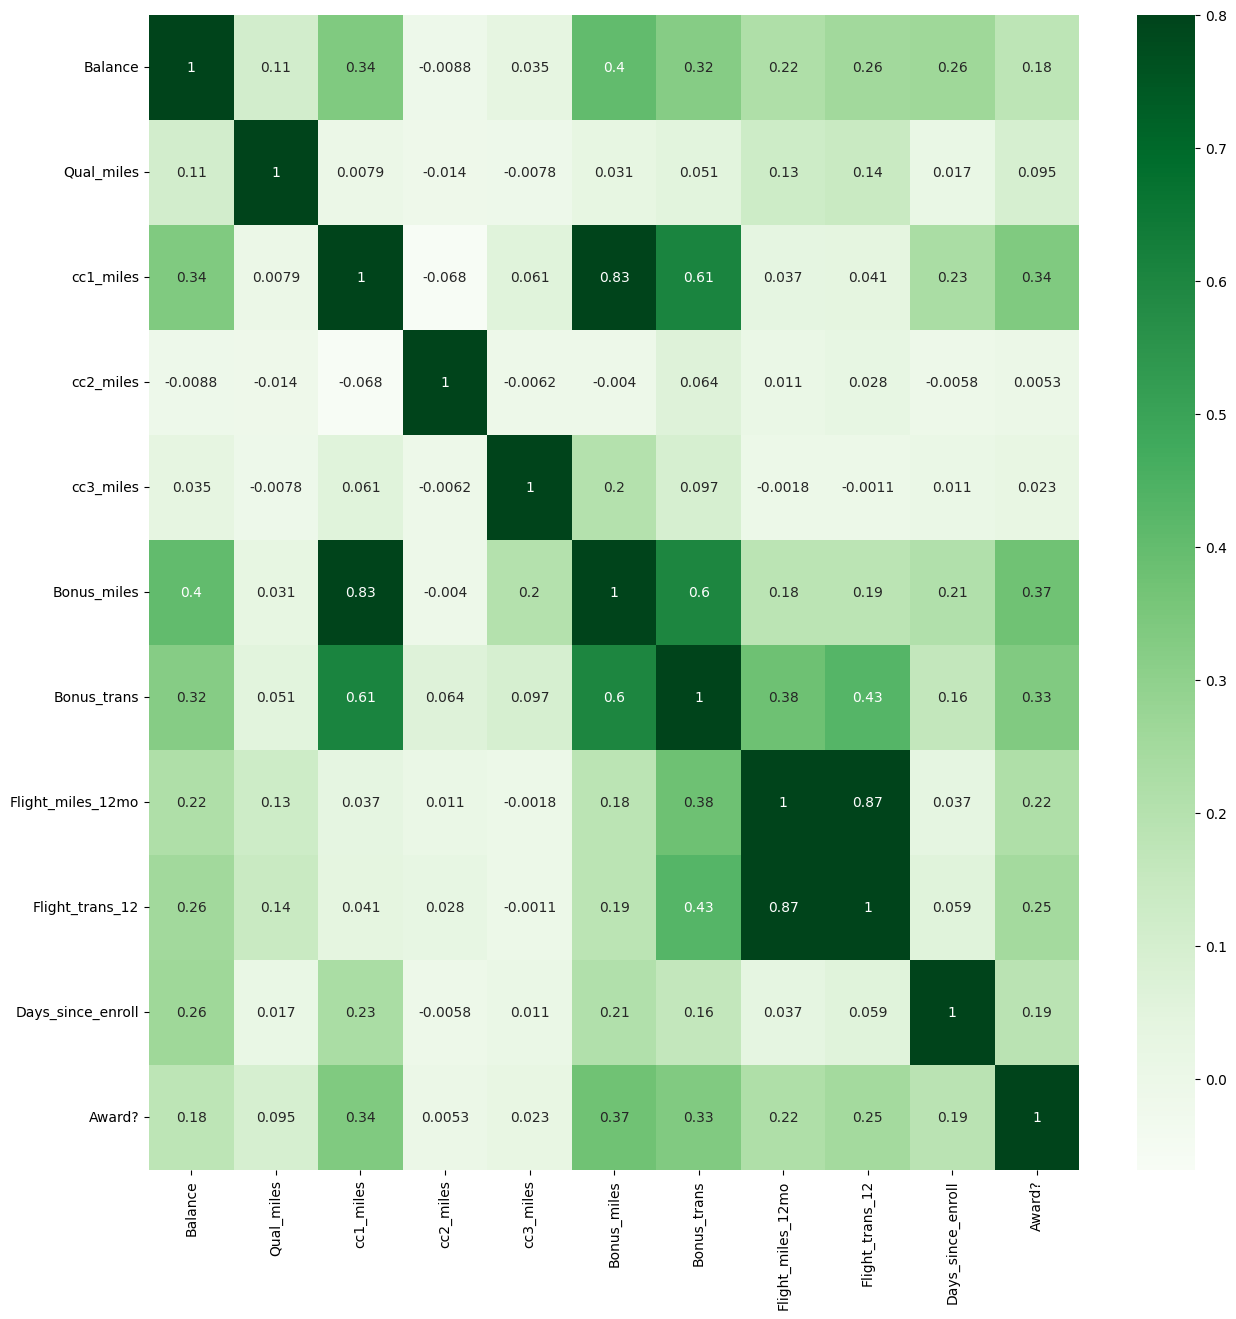

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens",vmax=.8)


In [7]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_8452\3226768377.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


<Axes: xlabel='Balance', ylabel='Density'>

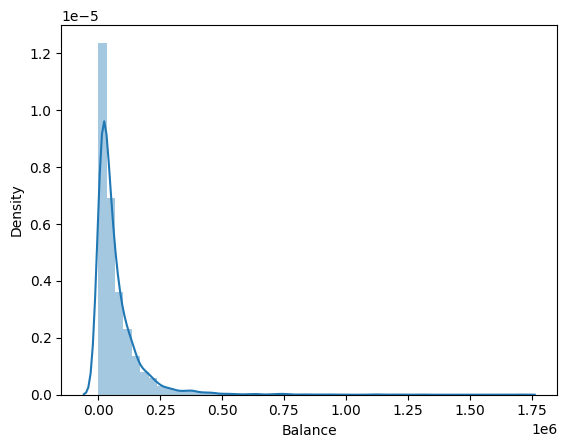

In [8]:
# Distribution of the Data

sns.distplot(df['Balance'])

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_8452\1308470759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bonus_miles'])


<Axes: xlabel='Bonus_miles', ylabel='Density'>

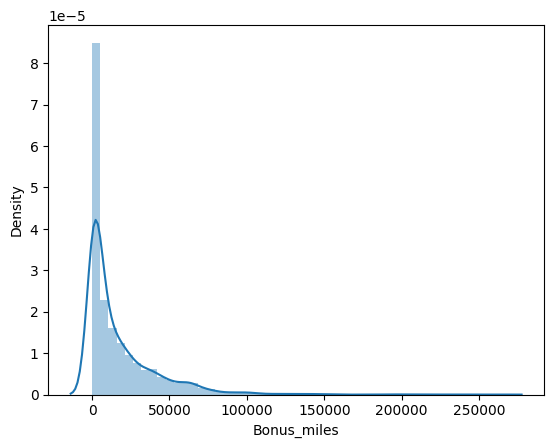

In [9]:
sns.distplot(df['Bonus_miles'])

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_8452\4137020428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Days_since_enroll'])


<Axes: xlabel='Days_since_enroll', ylabel='Density'>

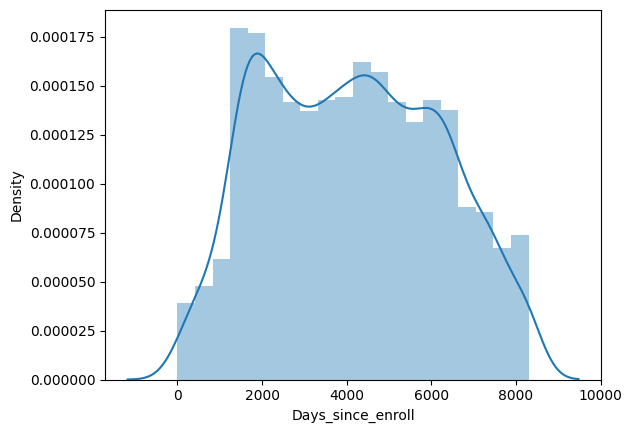

In [10]:
sns.distplot(df['Days_since_enroll'])

Most of the Data is Right Skewed

Text(0, 0.5, 'WCSS')

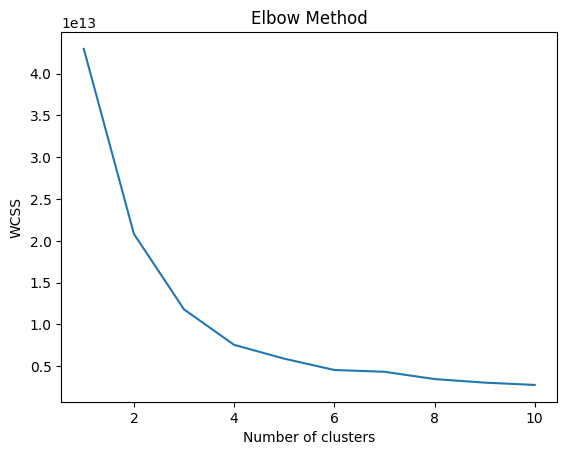

In [11]:
# Performinhg Clustering Usiong K-menas Clustering
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

from sklearn.cluster import KMeans
wcss = [] # list to contain inertia for different no. of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init= 'auto' , random_state=42)
    kmeans.fit(df.iloc[:,0:])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [12]:
## Create a K-means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df.iloc[:,0:])

df['Clusters'] = kmeans.fit_predict(df.iloc[:,0:])

collections.Counter(kmeans.labels_)


Counter({1: 3668, 0: 331})

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

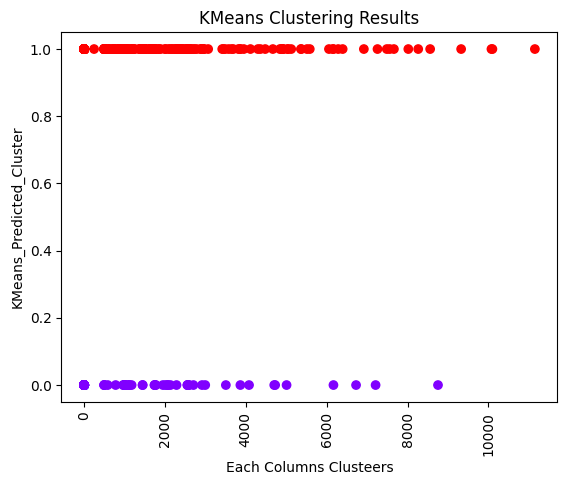

In [13]:
plt.scatter(df.iloc[:,1], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,2], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,3], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,4], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel("Each Columns Clusteers")
plt.ylabel('KMeans_Predicted_Cluster')
plt.xticks(rotation=90)

In [14]:
print('silhouette_score for KMeans Model is When Value of k = 2:', round(silhouette_score(df.iloc[:,0:],df['Clusters'])*100, 2), '%')

silhouette_score for KMeans Model is When Value of k = 2: 74.19 %


In [15]:
df3 = df.drop(columns=['Clusters'])
df3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
## Create a K-means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df3.iloc[:,0:])

df3['Clusters'] = kmeans.fit_predict(df3.iloc[:,0:])

collections.Counter(kmeans.labels_)


Counter({1: 3242, 0: 707, 2: 50})

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

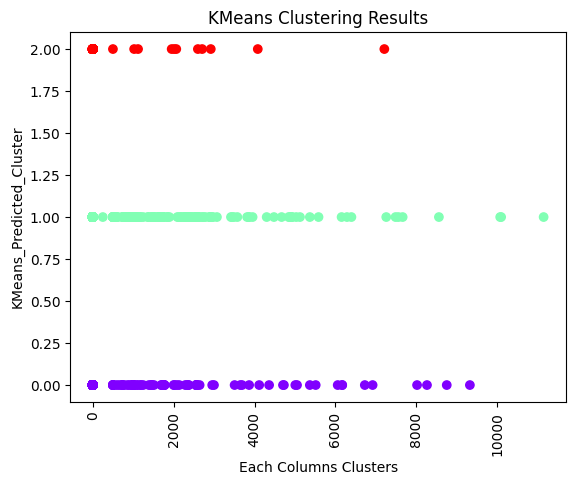

In [17]:
plt.scatter(df3.iloc[:,1], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,2], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,3], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,4], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel("Each Columns Clusters")
plt.ylabel('KMeans_Predicted_Cluster')
plt.xticks(rotation=90)

In [18]:
print('silhouette_score for KMeans Model is When Value of k = 3:', round(silhouette_score(df3.iloc[:,0:],df['Clusters'])*100, 2), '%')

silhouette_score for KMeans Model is When Value of k = 3: 74.19 %


# Hierarchical/Agglomerative_Clustering

In [19]:
df_hier = df.drop(columns=['Clusters'])

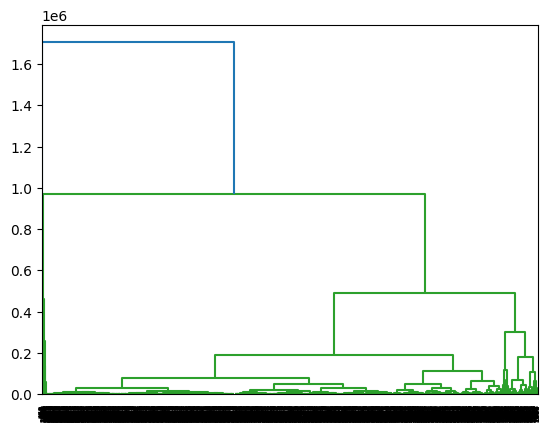

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendo = dendrogram(linkage(df_hier.iloc[:,0:4], method='complete'))

In [21]:
# create model for hierachical clusters
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_hier.iloc[:,0:])

# prediction
y_pred= model.fit_predict(df_hier.iloc[:,0:])

# storing predcited data in main data
df_hier['Hierachical_Predicted_Cluster']=y_pred

# sorting of data based on predicted data
df_hier=df_hier.sort_values('Hierachical_Predicted_Cluster')

df_hier.iloc[:,[0,-1]].tail(10)

,Balance,Hierachical_Predicted_Cluster
ID#,,
1352,189235,1
1353,38604,1
1354,73008,1
1355,62942,1
1356,33057,1
1357,42572,1
1358,38671,1
1359,5320,1
1346,2224,1


In [22]:
collections.Counter(model.labels_)

Counter({1: 3989, 0: 10})

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

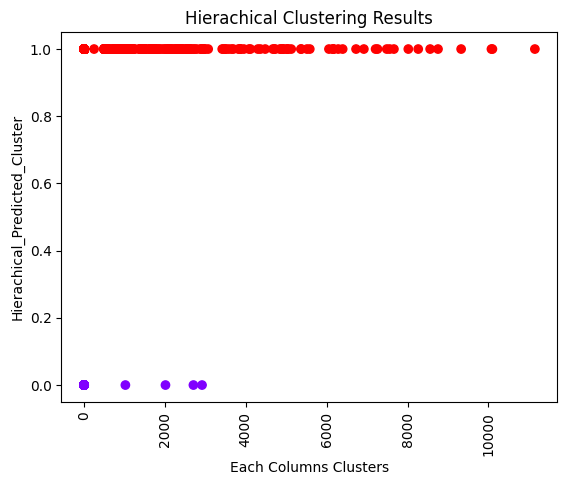

In [23]:
# Visualize the clustered data points
plt.scatter(df_hier.iloc[:,1], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,2], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,3], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,4], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.title('Hierachical Clustering Results')
plt.xlabel("Each Columns Clusters")
plt.ylabel('Hierachical_Predicted_Cluster')
plt.xticks(rotation=90)

In [24]:
print('silhouette_score for Hierechical_clustering Model is:', round(silhouette_score(df_hier.iloc[:,1:],df_hier['Hierachical_Predicted_Cluster'])*100, 2), '%')

silhouette_score for Hierechical_clustering Model is: 62.45 %


# DBSCAN Algorithm


In [25]:
dbsc = df.drop(columns=['Clusters'],axis=1)
dbsc.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
stscaler = StandardScaler()
X = stscaler.fit_transform(dbsc)


In [27]:
from sklearn.cluster import DBSCAN

model1 = DBSCAN(eps=2,min_samples=4)
model1.fit_predict(dbsc)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [28]:
cl=pd.DataFrame(model1.labels_,columns=['cluster'])
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [29]:
db_scan = pd.concat([dbsc,cl],axis=1)
db_scan

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,-1.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,-1.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,-1.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,-1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

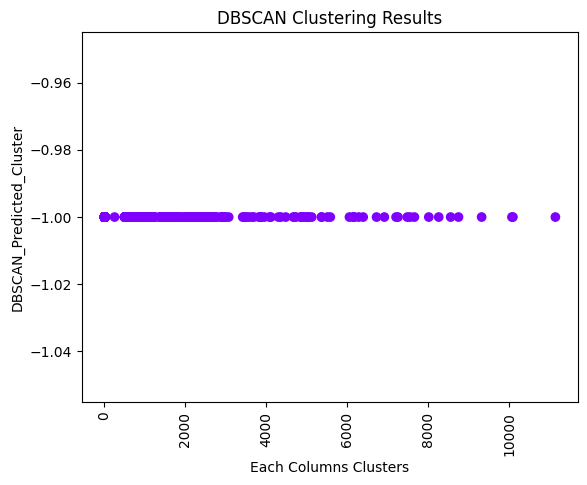

In [30]:
plt.scatter(db_scan.iloc[:,1],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,2],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,3],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,4],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.title('DBSCAN Clustering Results')
plt.xlabel("Each Columns Clusters")
plt.ylabel('DBSCAN_Predicted_Cluster')
plt.xticks(rotation=90)

silhouette_score for K-means Clustering When value of k = 2 is 74.19 %<br>
silhouette_score for K-means Clustering When value of k = 3 is 64.96 %<br>
silhouette_score for Hierechical_clustering is 62.45 %<br>
From Above Analysis The Best silhouette_score is for K-Means Clustering Algorithm when the value of k = 2<br>
So We can use Kmeans Clustering for Future Purpose<br>
Among the three of clustering Algorithms K-Means Perform better in Every Scenario